In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import sys
sys.path.insert(1,'E:\DUY\DS\deeplearning\CustomTools')
import ultility_tools as utt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# 1/ Loading DATA

In [2]:
# load data
data = load_iris()
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# features
X = pd.DataFrame(data.data,columns=data.feature_names)
utt.fix_column_names(X)

# response
y = data.target

# all
Xy = X.copy()
Xy["response"] = y
print(Xy.info())

# get names
feature_names = X.columns
response_name = "response"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   response         150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


# 2/ EDA

## 2.1/ Un-variable analysis

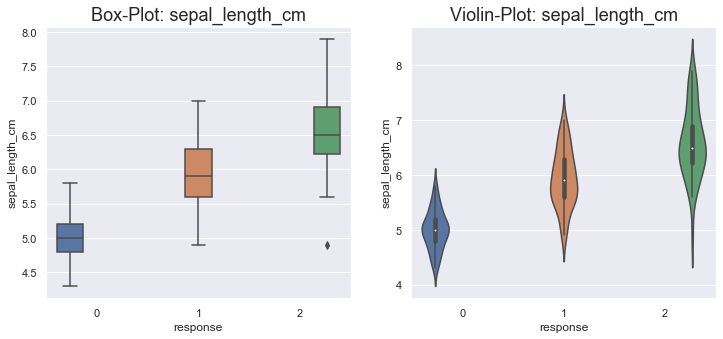

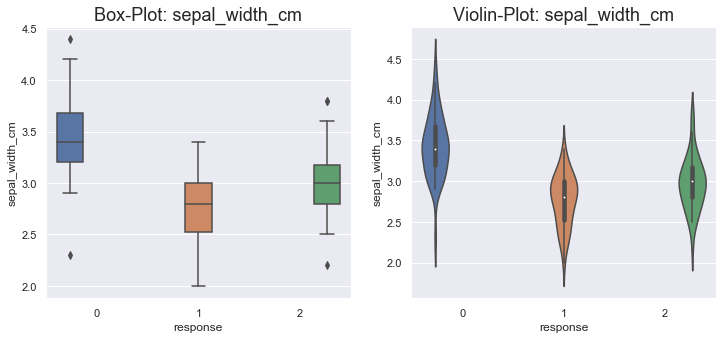

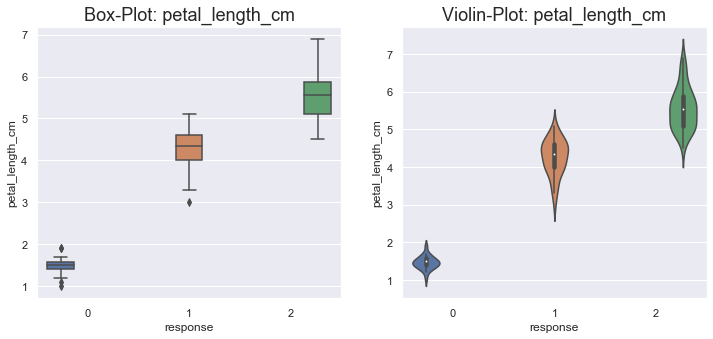

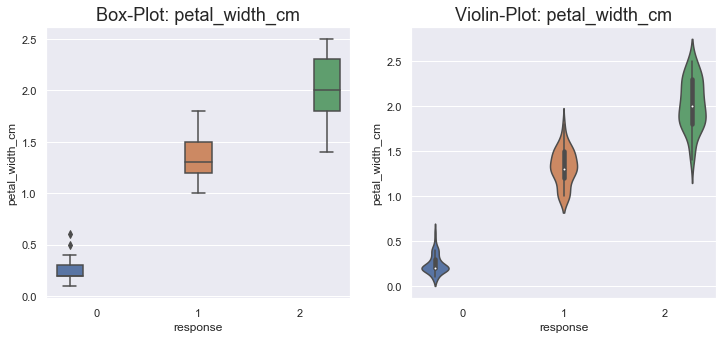

In [4]:
for feature_name in feature_names:
    utt.plot_boxvio_one_att(Xy,feature_name,"response")


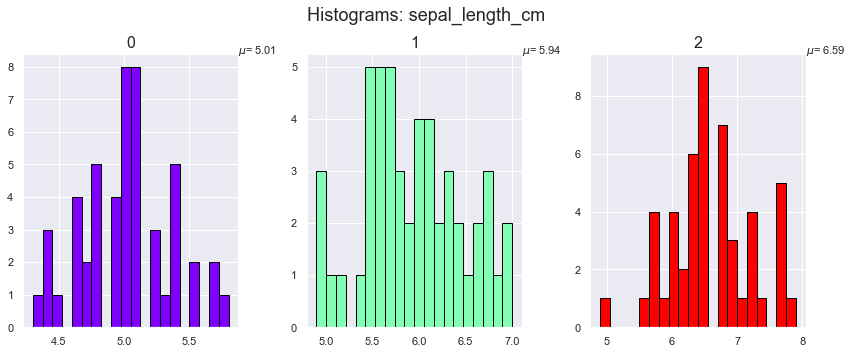

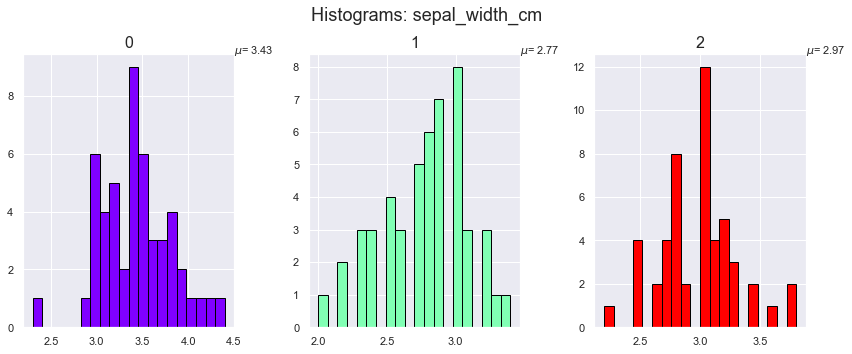

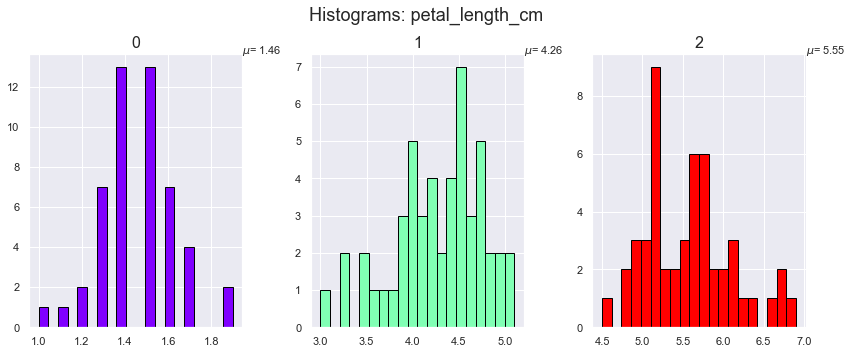

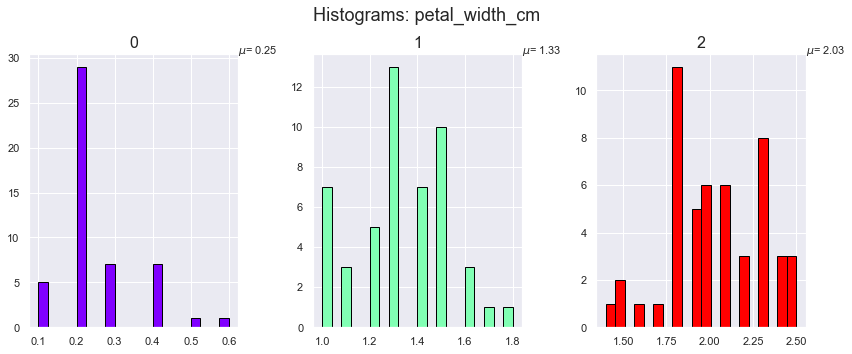

In [5]:
for feature_name in feature_names:
    utt.plot_hist_attributes(Xy,feature_name,"response",bins=20)

## 2.2/ Multi-variable analysis

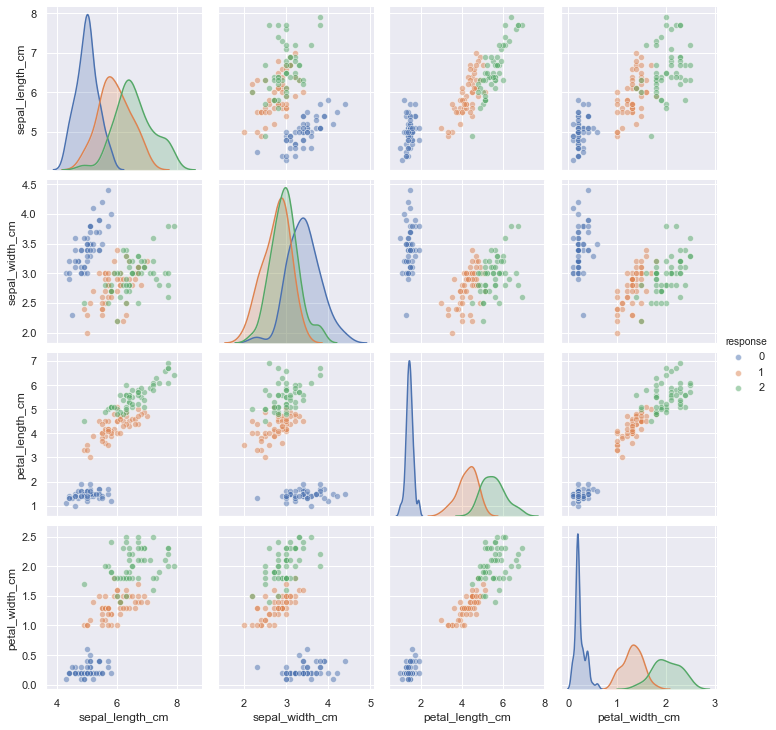

In [6]:
sns.pairplot(Xy,hue=response_name,plot_kws = {'alpha': 0.5})
plt.show()

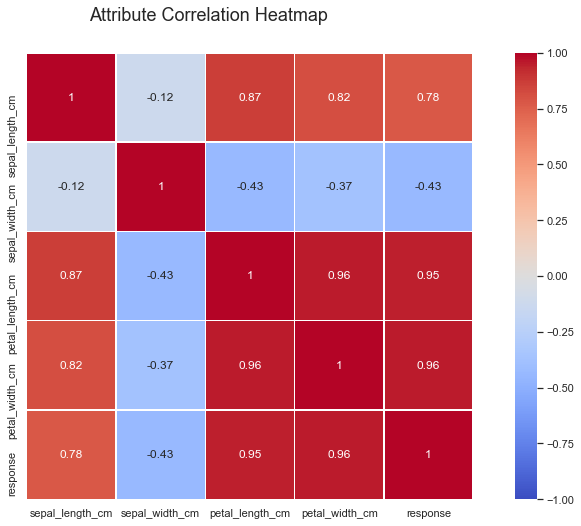

In [7]:
corr = utt.get_corr(Xy)



# 3/ Data Transformation - PCA (unsupervised manner)

## 3.1/ Quick fit

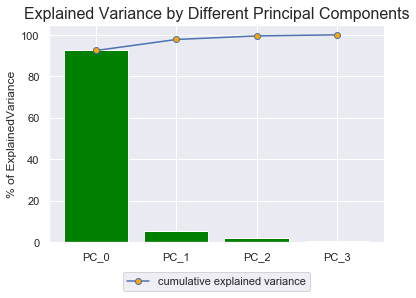

In [8]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X)

pca_percent = pca.explained_variance_ratio_*100
fig = plt.figure()
plt.bar([f'PC_{i}' for i in range(len(pca_percent))],pca_percent,color = "green")
plt.plot(np.cumsum(pca_percent),marker='o',markerfacecolor='orange',label='cumulative explained variance')
plt.title('Explained Variance by Different Principal Components',fontsize=16)
plt.ylabel('% of ExplainedVariance')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25))
plt.show()


## 3.1/ Unscaled data

EigenVectors: [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
EigenValues: [4.22824171 0.24267075]
Explained-Variances(%): [92.46187232  5.30664831]


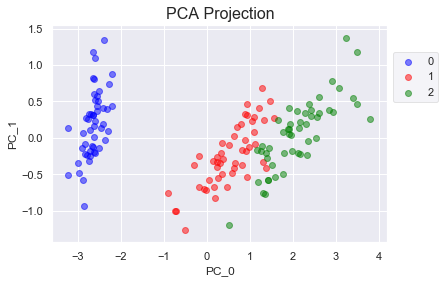

In [20]:
pca = PCA(n_components=2)
pca.fit(X)
print(f"EigenVectors: {pca.components_}")
print(f"EigenValues: {pca.explained_variance_}")
print(f"Explained-Variances(%): {pca.explained_variance_ratio_*100}")

# transforming
X_transformed = pca.transform(X)

# plot
x1 = X_transformed[:,0]
y1 = X_transformed[:,1]
utt.plot_in_groups(x1,y1,y,
                   title= "PCA Projection: Unscaled Features",
                   x_label="PC_0",y_label="PC_1")

## 3.2/ Scaled data (more common use)

EigenVectors: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
EigenValues: [2.93808505 0.9201649 ]
Explained-Variances(%): [72.96244541 22.85076179]


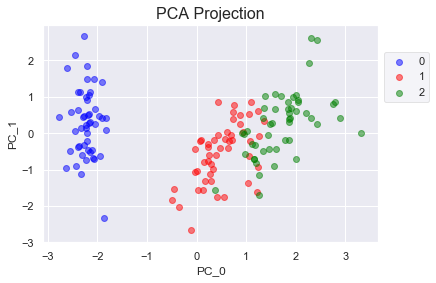

In [21]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
print(f"EigenVectors: {pca.components_}")
print(f"EigenValues: {pca.explained_variance_}")
print(f"Explained-Variances(%): {pca.explained_variance_ratio_*100}")

# transforming
X_scaled_transformed = pca.transform(X_scaled)

# plot
x1 = X_scaled_transformed[:,0]
y1 = X_scaled_transformed[:,1]
utt.plot_in_groups(x1,y1,y,
                   title= "PCA Projection: Scaled Features",
                   x_label="PC_0",y_label="PC_1")


# 4/ Data Transformation - LDA (supervised manner)

## 4.1/ Quick fit

EigenVectors: [[-0.82937764  0.02410215]
 [-1.53447307  2.16452123]
 [ 2.20121166 -0.93192121]
 [ 2.81046031  2.83918785]]
EigenValues: [0.9912126 0.0087874]
Explained-Variances(%): [99.1212605  0.8787395]


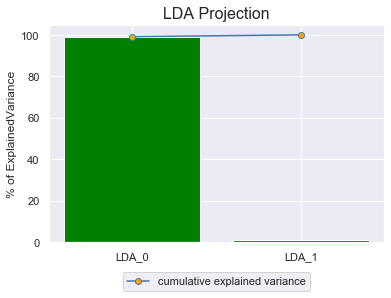

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

print(f"Scaling-Vectors: {lda.scalings_}")
print(f"Explained-Variances(%): {lda.explained_variance_ratio_*100}")

lda_percent = lda.explained_variance_ratio_*100
fig = plt.figure()
plt.bar([f'LDA_{i}' for i in range(len(lda_percent))],lda_percent,color = "green")
plt.plot(np.cumsum(lda_percent),marker='o',markerfacecolor='orange',label='cumulative explained variance')
plt.title('LDA Projection',fontsize=16)
plt.ylabel('% of ExplainedVariance')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25))
plt.show()


## 4.1/ Unscaled data

Scaling-Vectors: [[-0.82937764  0.02410215]
 [-1.53447307  2.16452123]
 [ 2.20121166 -0.93192121]
 [ 2.81046031  2.83918785]]
Explained-Variances(%): [99.1212605  0.8787395]


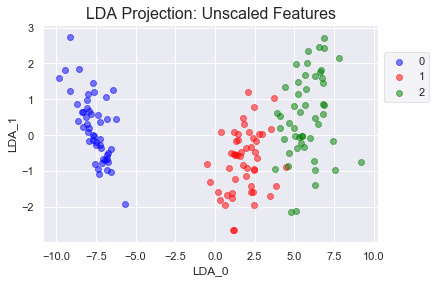

In [28]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
print(f"Scaling-Vectors: {lda.scalings_}")
print(f"Explained-Variances(%): {lda.explained_variance_ratio_*100}")

# transforming
X_transformed = lda.transform(X)

# plot
x1 = X_transformed[:,0]
y1 = X_transformed[:,1]
utt.plot_in_groups(x1,y1,y,
                   title= "LDA Projection: Unscaled Features",
                   x_label="LDA_0",y_label="LDA_1")

## 4.2/ Scaled data (more common use)

Scaling-Vectors: [[-0.68448644  0.01989153]
 [-0.66659193  0.94029176]
 [ 3.87282074 -1.63962597]
 [ 2.13508598  2.15691008]]
Explained-Variances(%): [99.1212605  0.8787395]


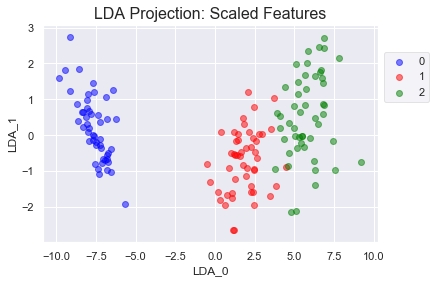

In [27]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled,y)
print(f"Scaling-Vectors: {lda.scalings_}")
print(f"Explained-Variances(%): {lda.explained_variance_ratio_*100}")

# transforming
X_transformed = lda.transform(X_scaled)

# plot
x1 = X_transformed[:,0]
y1 = X_transformed[:,1]
utt.plot_in_groups(x1,y1,y,
                   title= "LDA Projection: Scaled Features",
                   x_label="LDA_0",y_label="LDA_1")

# 5/ Pipeline

## 5.1/ Without any transformations

In [30]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)

print(cross_val_score(knn,X,y).mean())

0.9666666666666668


## 5.2/ With feature selection/transformations


### Feature selection

In [36]:
from sklearn.feature_selection import SelectKBest
for k in [1,2,3]:
    pipe = Pipeline([("select",SelectKBest(k=k)),
                     ("knn",knn)])
    print(f"k = {k} --- {cross_val_score(pipe,X,y).mean()}")


k = 1 --- 0.9533333333333334
k = 2 --- 0.9533333333333334
k = 3 --- 0.9733333333333334


### Feature transformation

In [31]:
pipe1 = Pipeline([("pca",PCA(n_components=1)),
                  ("knn",knn)])
print(cross_val_score(pipe1,X,y).mean())

0.9


In [32]:
pipe2 = Pipeline([("pca",PCA(n_components=2)),
                  ("knn",knn)])
print(cross_val_score(pipe2,X,y).mean())



0.9666666666666668


In [33]:
pipe3 = Pipeline([("dla",LinearDiscriminantAnalysis(n_components=1)),
                  ("knn",knn)])
print(cross_val_score(pipe3,X,y).mean())



0.9666666666666666


In [34]:
pipe4 = Pipeline([("dla",LinearDiscriminantAnalysis(n_components=2)),
                  ("knn",knn)])
print(cross_val_score(pipe4,X,y).mean())



0.9733333333333334


In [43]:
pipe5 = Pipeline([("scaler", StandardScaler()),
                  ("pca",PCA()),
                  ("dla",LinearDiscriminantAnalysis()),
                  ("knn",KNeighborsClassifier())])
pipe5_params = {"scaler__with_std":[True,False],
                "pca__n_components":[1,2,3,4],
                "dla__n_components":[1,2],
                "knn__n_neighbors":[3]}

grid = utt.get_best_for_model(pipe5,pipe5_params,X,y)
grid

C:\Users\zacha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\zacha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\zacha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnin

************************************************
Best Accuracy: 0.9800000000000001
Best Parameters: {'dla__n_components': 1, 'knn__n_neighbors': 3, 'pca__n_components': 3, 'scaler__with_std': False}
Average Time to Fit: 0.003 (s)
Average Time to Score: 0.003 (s)
************************************************


GridSearchCV(cv=None, error_score=0.0,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('dla',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                             

In [45]:
grid.best_score_
grid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=False)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dla',
                 LinearDiscriminantAnalysis(n_components=1, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)